In [12]:
import deepxde as dde
from deepxde.backend import tf

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
x = torch.ones(3, device=torch.device("cuda"))

In [6]:
x

tensor([1., 1., 1.], device='cuda:0')

In [7]:
x = x.to("cpu")

In [8]:
x

tensor([1., 1., 1.])

In [9]:
y = x.numpy()

In [10]:
y

array([1., 1., 1.], dtype=float32)

In [11]:
z = torch.tensor(y, device=torch.device("cpu"))
z

tensor([1., 1., 1.])

Back Propogation

In [13]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad= True)

In [14]:
y_hat = w*x
s = y_hat-y
loss = (s)**2

In [15]:
print(loss)

tensor(1., device='cuda:0', grad_fn=<PowBackward0>)


In [16]:
loss.item()

1.0

In [17]:
loss.backward()

In [19]:
print(w.grad)
print(w.grad.item())

tensor(-2., device='cuda:0')
-2.0


Heat Equation Numerically

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

[[100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 ...
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]]


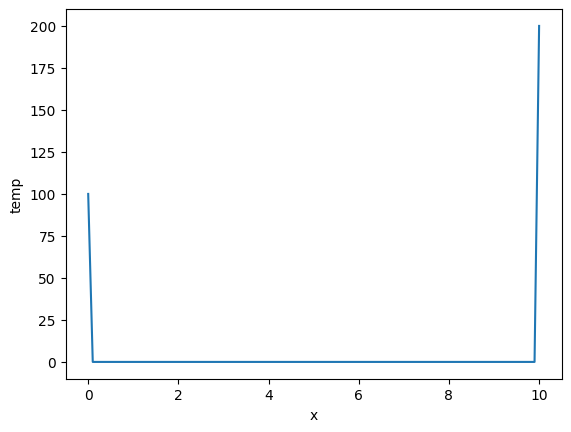

In [32]:
length = 10
k = 0.89 #aluminum
temp_left = 100
temp_right = 200
total_sim_time = 10

#----- discritization
dx = 0.1
x_vec = np.linspace(0, length, int(length/dx))

dt = 0.0001
t_vec = np.linspace(0, total_sim_time, int(total_sim_time/dt))

#----- I.C.
u = np.zeros([len(t_vec), len(x_vec)])

#----- B.C.
u[:,0] = temp_left
u[:,-1] = temp_right

print(u)

plt.plot(x_vec, u[0])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

In [36]:
# ------ Solve\

for t in range(1, len(t_vec)-1):
    for x in range(1, len(x_vec)-1):
        u[t+1,x] = ((k * (dt/dx**2)) * (u[t, x+1] - 2 * u[t,x] + u[t,x-1])) + u[t,x]

In [23]:
u

array([[100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 200.        ],
       [100.        ,   0.89      ,   0.        , ...,   0.        ,
          1.78      , 200.        ],
       ...,
       [100.        ,  98.59123721,  97.1847561 , ..., 192.92058415,
        196.4589255 , 200.        ],
       [100.        ,  98.59125751,  97.1847967 , ..., 192.92063276,
        196.45894983, 200.        ],
       [100.        ,  98.59127782,  97.1848373 , ..., 192.92068138,
        196.45897415, 200.        ]])

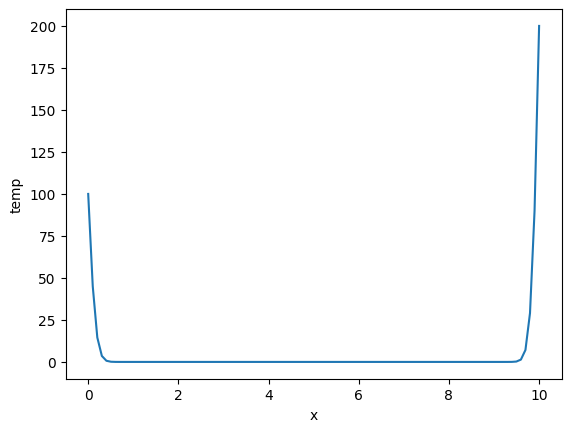

In [37]:
plt.plot(x_vec, u[100])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

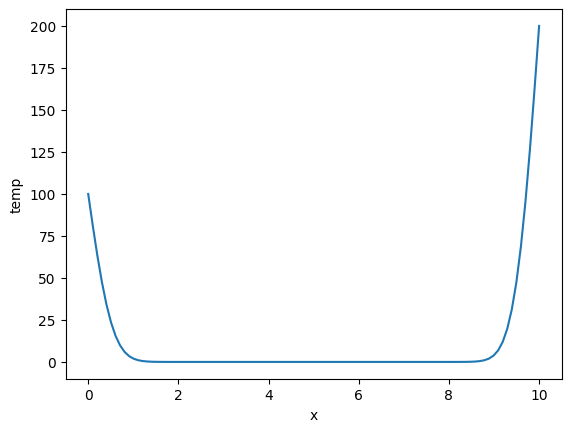

In [38]:
plt.plot(x_vec, u[1000])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

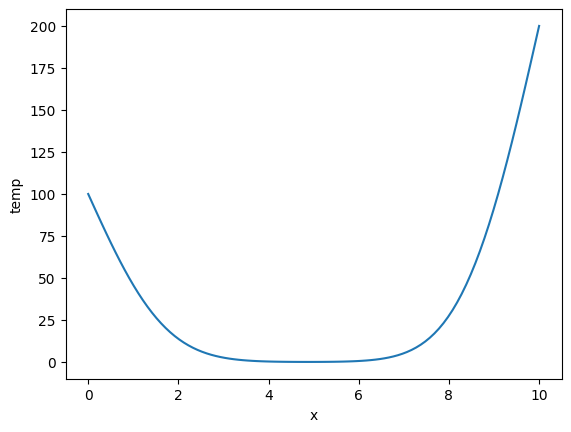

In [39]:
plt.plot(x_vec, u[10000])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

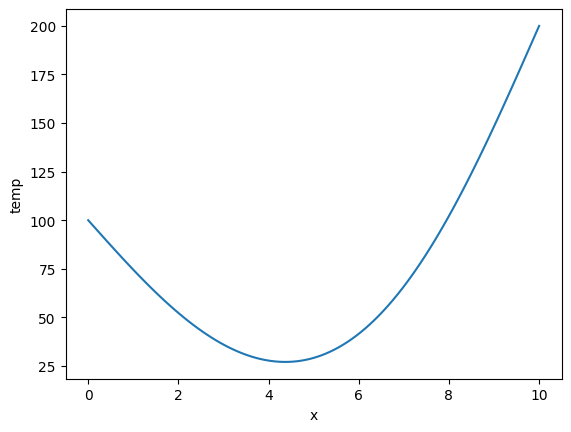

In [40]:
plt.plot(x_vec, u[50000])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

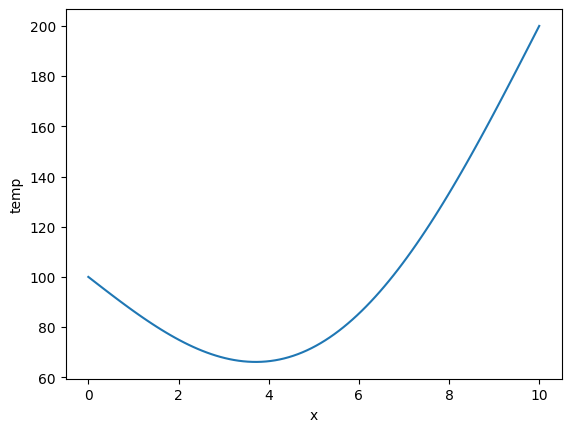

In [41]:
plt.plot(x_vec, u[99999])
plt.xlabel('x')
plt.ylabel('temp')
plt.show()

Burger's equation 2D

In [49]:
nt = 500
nx = 51
ny = 51

nu = 0.1
dt = 0.001

dx = 2/(nx-1)
dy = 2/(ny-1)

# ----- Domain

x = np.linspace(0,2, nx)
y = np.linspace(0,2, ny)

# Grid

comb = np.zeros((ny,nx))

u = np.zeros((ny,nx))
v = np.zeros((ny,nx))

un = np.zeros((ny,nx)) # u_new
vn = np.zeros((ny,nx)) # v_new

# Final solution in time
uf = np.zeros((nt, ny,nx)) # u_final
vf = np.zeros((nt, ny,nx)) # v_final


# ----- B.C.
u[:,:] = 1
v[:,:] = 1

uf[:,:] = 1
vf[:,:] = 1

u[int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5
v[int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5

# ----- I.C.
uf[0, int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5
vf[0, int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5

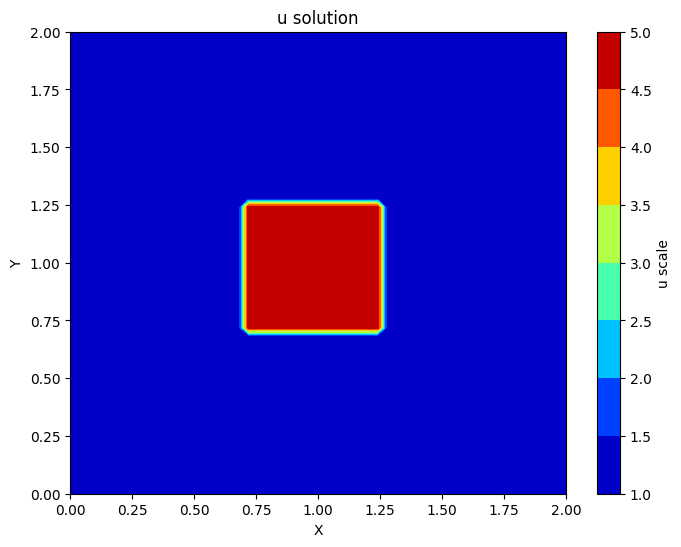

In [50]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title('u solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar(contour)
colorbar.set_label('u scale')

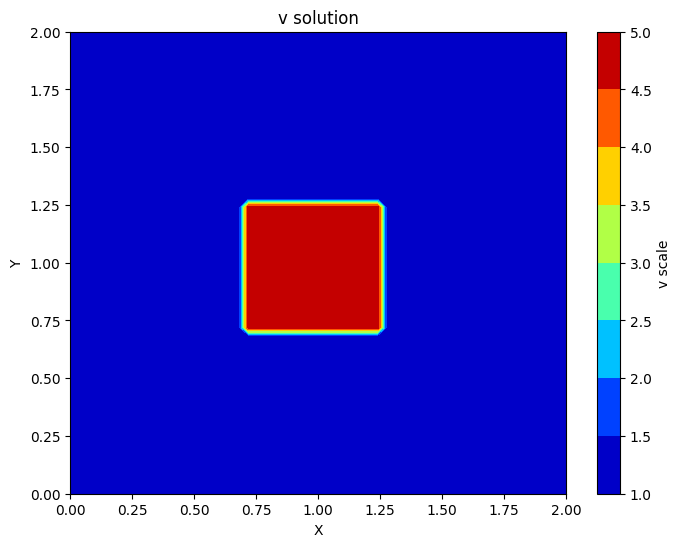

In [51]:
plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, v[:], cmap='jet')
plt.title('v solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar(contour)
colorbar.set_label('v scale')

In [52]:
# ----- Solving, backward scheme for 1st derivative (time & space), central scheme for 2nd space derivative

for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n,i,j] = u[i,j]
            vf[n,i,j] = v[i,j]
    # update B.C.
    u[:,0 ] = 1
    u[:,-1] = 1
    u[0,: ] = 1
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1

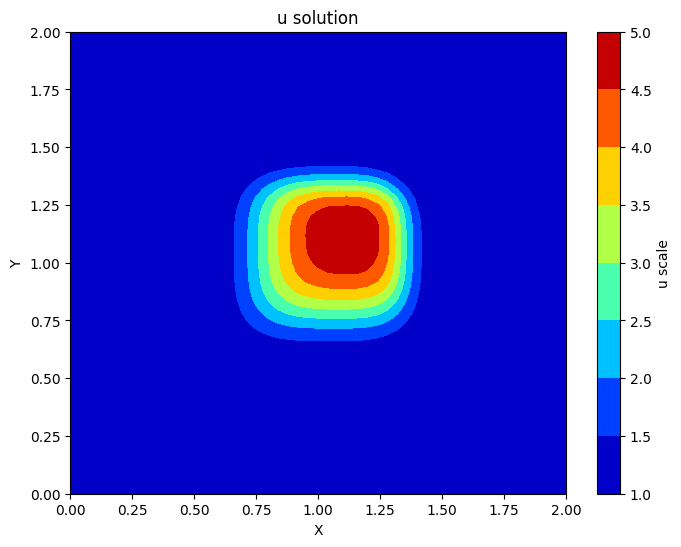

In [53]:
X, Y = np.meshgrid(x,y)

#set the time as you like
u = uf[30,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

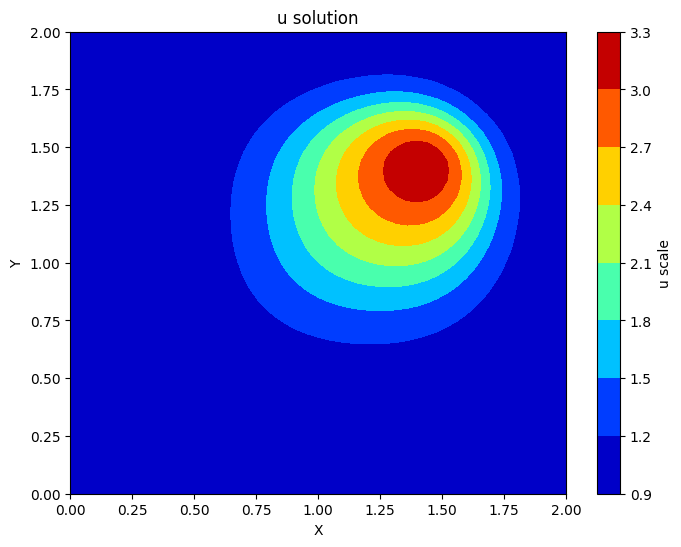

In [54]:
u = uf[150,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

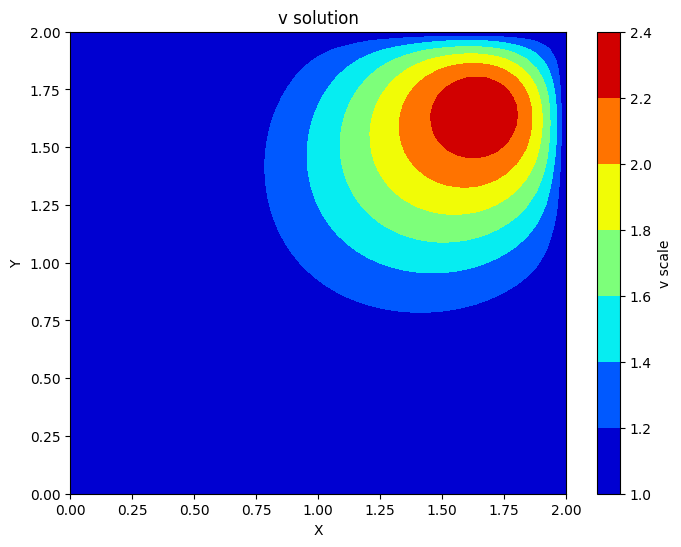

In [55]:
v = vf[300,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

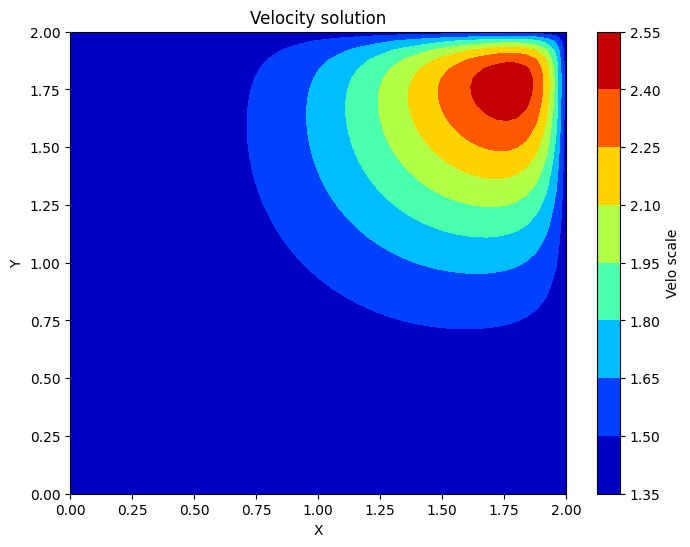

In [58]:
u = uf[499,:,:]
v = vf[499,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,np.sqrt(u**2 + v**2), cmap='jet')
plt.title("Velocity solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("Velo scale")

1D Burger's with PyTorch

In [59]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn

In [63]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = torch.nn.Sequential(
            nn.Linear(2,20),
            nn.Tanh(),
            nn.Linear(20,30),
            nn.Tanh(),
            nn.Linear(30,30),
            nn.Tanh(),
            nn.Linear(30,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,1)
        )
        
    def forward(self, x):
        out = self.net(x)
        return out

In [104]:
#---------- Test

x_test = torch.arange(-1,1+0.1, 0.1)
print(x_test)
t_test = torch.arange(0,1+0.1, 0.1)
print(t_test)

X = torch.stack(torch.meshgrid(x_test,t_test)).reshape(2,-1).T
X.shape

tensor([-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
         1.4901e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00], device='cuda:0')
tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000], device='cuda:0')


torch.Size([231, 2])

In [111]:
#---------- Test

bc1_test = torch.stack(torch.meshgrid(x_test[0],t_test)).reshape(2,-1).T
print(bc1_test.shape)

ic_test = torch.stack(torch.meshgrid(x_test,t_test[0])).reshape(2,-1).T
print(ic_test)

y_bc1_t = torch.zeros(len(bc1_test)) # Will make (11, ) tensor bc it is the same as length of bc1
y_bc2_t = torch.zeros(len(ic_test))
print(len(bc1_test))

y_train_test = torch.cat([y_bc1_t, y_bc1_t, y_bc2_t]) # Rows 11 + 11 + 21 = 43
y_train_t = y_train_test.unsqueeze(1)  # Making 43, -> 43,1
print(y_train_test.shape)
print(y_train_t.shape)
print(y_train_t)

torch.Size([11, 2])
tensor([[-1.0000e+00,  0.0000e+00],
        [-9.0000e-01,  0.0000e+00],
        [-8.0000e-01,  0.0000e+00],
        [-7.0000e-01,  0.0000e+00],
        [-6.0000e-01,  0.0000e+00],
        [-5.0000e-01,  0.0000e+00],
        [-4.0000e-01,  0.0000e+00],
        [-3.0000e-01,  0.0000e+00],
        [-2.0000e-01,  0.0000e+00],
        [-1.0000e-01,  0.0000e+00],
        [ 1.4901e-08,  0.0000e+00],
        [ 1.0000e-01,  0.0000e+00],
        [ 2.0000e-01,  0.0000e+00],
        [ 3.0000e-01,  0.0000e+00],
        [ 4.0000e-01,  0.0000e+00],
        [ 5.0000e-01,  0.0000e+00],
        [ 6.0000e-01,  0.0000e+00],
        [ 7.0000e-01,  0.0000e+00],
        [ 8.0000e-01,  0.0000e+00],
        [ 9.0000e-01,  0.0000e+00],
        [ 1.0000e+00,  0.0000e+00]], device='cuda:0')
11
torch.Size([43])
torch.Size([43, 1])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]

In [112]:
class Net:
    def __init__(self):
        device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        
        self.model = NN().to(device)
        
        # Data of domain (Here it is grided, but don't require regular or even grided data. IT CAN BE RANDOMLY GENERATED)
        self.h = 0.1 # step size for x direction
        self.k = 0.1 # step size for time
        x = torch.arange(-1,1+self.h, self.h)
        t = torch.arange(0,1+self.k, self.k)
        
        self.X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T       # Size = (231, 2)
        
        # Training data (B.C.s and I.C.)
        bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1).T       # Left boundary points only
        bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1).T      # Right boundary points only
        ic  = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1).T       # All x points at t=0
        self.X_train = torch.cat([bc1, bc2, ic])                        # Size = (11 + 11 + 21= 43, 2)
        
        # u (solution) at boundary and at t=0
        y_bc1 = torch.zeros(len(bc1))
        y_bc2 = torch.zeros(len(bc2))
        y_ic  = -torch.sin(math.pi * ic[:,0])                           # IC, at t=0, u = -sin(pi*x), (ic[:,0] gives only x values at all t which is 0)
        self.y_train = torch.cat([y_bc1, y_bc2, y_ic])
        self.y_train = self.y_train.unsqueeze(1)
        
        # To CUDA if available. Also, requires gradient for data points- yes ...
        self.X = self.X.to(device)
        self.y_train = self.y_train.to(device)
        self.X_train = self.X_train.to(device)
        self.X.requires_grad = True
        
        # Optimizer setting
        self.adam = torch.optim.Adam(self.model.parameters())
        
        self.optimizer = torch.optim.LBFGS(                            # L-BFGS Limited-memory Broyden-Fletcher-Goldfarb-Shanno
            self.model.parameters(),
            lr = 1.0,
            max_iter = 50000,
            max_eval = 50000,
            history_size = 50,
            tolerance_grad = 1e-7,
            tolerance_change = 1.0 * np.finfo(float).eps,              # np.finfo(float).eps returns “machine epsilon- smallest possible positive number”, to avoid calculating log(0) = inf
            line_search_fn = "strong_wolfe"
        )
        
        self.criterion = torch.nn.MSELoss()
        self.iter = 1
        
    def loss_func(self):
        self.adam.zero_grad()
        self.optimizer.zero_grad()
        
        # ----- Loss from data at boundaries and at t=0
        y_pred = self.model(self.X_train)                              # y predicted at boundary. Size = (43, 1)
        loss_data = self.criterion(y_pred,self.y_train)                # loss from data at boundaries and t=0. Size = (43, 1)
        
        # ----- Loss from PDE
        u = self.model(self.X)                                         # u predicted in whole domain at all time. X = (x,t). Size = (231, 1). u at all points x points -> 21 and all time points -> 11
        
        # Whole derivative --> du_dX --> du_d(x,t)
        du_dX = torch.autograd.grad(
            u,
            self.X,
            grad_outputs = torch.ones_like(u),
            create_graph = True,
            retain_graph = True
        )[0]                                                           # Because it will be in tuple and we want tensor (tuple[0] = tensor)
        
        du_dt = du_dX[:,1]                                             # du_dX = du_d(x,t), so 2nd index is du_dt
        du_dx = du_dX[:,0]                                             # du_dX = du_d(x,t), so 1st index is du_dx
        
        #print(du_dX)
        #print("-------xxxxxxxxx----------")
        #print(du_dX[0])
        
        # Second whole derivative --> du_dXX --> d(du_d(x,t))_d(x,t)
        du_dXX = torch.autograd.grad(
            du_dX,
            self.X,
            grad_outputs = torch.ones_like(du_dX),
            create_graph = True,
            retain_graph = True
        )[0]                                                           # Because it will be in tuple and we want tensor (tuple[0] = tensor)
        
        du_dxx = du_dXX[:,0]                                           # d(du_d(x,t))_d(x,t), so 1st index is du_dxx (d^2 u/dx^2)
        
        loss_pde = self.criterion(du_dt + u.squeeze()*du_dx, (0.01/math.pi) * du_dxx)  # u.squeeze b/c, u size (231,1) -> (231,)

        
        # ----- Total Loss
        loss = loss_pde + loss_data
        # ----- Back Propogation
        loss.backward()
        
        # Print loss at every 100 iterations
        if self.iter % 100 == 0:
            print(self.iter, loss.item())
            
        # iteration value update
        self.iter = self.iter + 1
        
        return loss
    